=======using pretrained faster_rcnn_resnet50_v1b_voc======
======24 bbox of persons are detected====


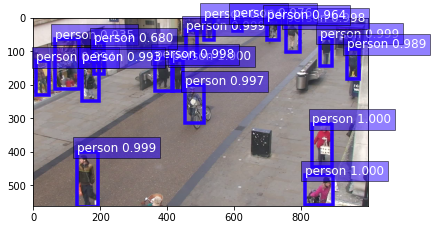

=======using pretrained ssd_512_resnet50_v1_voc======


/Applications/anaconda3/lib/python3.7/site-packages/mxnet/gluon/block.py:1389: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


======40 bbox of persons are detected====


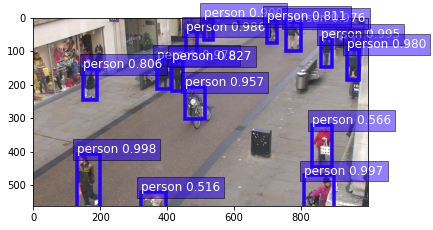

=======using pretrained yolo3_darknet53_voc======
======24 bbox of persons are detected====


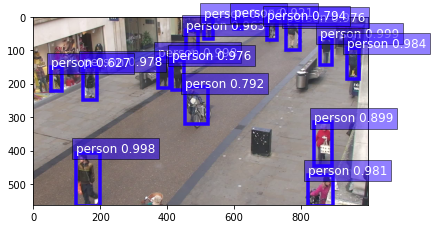

In [2]:
import gluoncv
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt
import numpy
from collections import defaultdict
'''
step0 install gluoncv
pip install --upgrade mxnet gluoncv
'''
class Model_Zoo:
    def __init__(self,selected_model):
        print('=======using pretrained {0}======'.format(selected_model))
        self.smodel = selected_model
    def detect(self,image,display=False):
        '''get bbox for input image'''
        net = model_zoo.get_model(self.smodel, pretrained=True)
        x, orig_img = data.transforms.presets.rcnn.load_test(image)
        box_ids, scores, bboxes = net(x)
        #possible classes:
        #print(net.classes)
        #person = 14
        person_index = []
        for i in range(box_ids.shape[1]):
            if box_ids[0][i][0] == 14 and scores[0][i][0] != -1:
                person_index.append(i)
        #select bbox of person
        #p1:bbox id of person
        #p2:confidence score
        #p3:bbox location
        print('======{0} bbox of persons are detected===='.format(len(person_index)))
        p1,p2,p3 = box_ids[0][[person_index],:],scores[0][[person_index],:],bboxes[0][[person_index],:]
        if display:
            ax = utils.viz.plot_bbox(orig_img, p3[0], p2[0], p1[0], class_names=net.classes)
            plt.show()
        bbox_center = self.bbox_center(p3)
        return bbox_center
        
    def bbox_center(self,bbox_location):
        '''calculate center coordinate for each bbox'''
        rst = []
        for loc in range(bbox_location[0].shape[0]):
            (xmin, ymin, xmax, ymax) = bbox_location[0][loc]
            center_x = (xmin+xmax)/2
            center_y = (ymin+ymax)/2
            rst.append([center_x,center_y])
        return rst

if __name__=='__main__':
    test_img = '../video_frames/0.png'
    pretrained_models = ['faster_rcnn_resnet50_v1b_voc','ssd_512_resnet50_v1_voc','yolo3_darknet53_voc']
    bbox_center = defaultdict(list)
    for m in pretrained_models:
        detect_model = Model_Zoo(m)
        rst = detect_model.detect(test_img,display=True)
        bbox_center[m].append(rst)
        

